In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
periodic = False
probabilistic_mode = False

if periodic:
    def DoSum(m,size,layers):
        c = np.zeros([size,size])
        c -= m
        for i in range(-layers,layers+1):
            for j in range(-layers,layers+1):
                c += np.roll(m,(i,j),(0,1))
        return c
else:
    def DoSum(m,size,layers):
        c = np.zeros([size,size])
        c -= m
        for i in range(-layers,layers+1):
            for j in range(-layers,layers+1):
                c += np.roll(m,(i,j),(0,1))
                
        c[:,size-1] -= m[:,0]
        c[:,0] -= m[:,size-1]
        c[size-1,:] -= m[0,:]
        c[0,:] -= m[size-1,:]
        return c


if probabilistic_mode:
    def step(m,size,layers):
        c = DoSum(m,size,layers)
        m[c<2] = 0 
        m[c>3] = 0
        m[c == 3] = 1
        m[c == 2] = np.random.randint(0, 2,len(m[c == 2]) , dtype='l')
        return m
else:
    def step(m,size,layers):
        c = DoSum(m,size,layers)
        m[c<2] = 0 
        m[c>3] = 0
        m[c == 3] = 1
        return m

    
def iterations(initial_state,size,layers,number_of_iterations):
    m = initial_state()
    plt.imshow(m)
    plt.show()
    for i in range(number_of_iterations):
        m = step(m,size,layers)
        plt.imshow(m)
        plt.show()

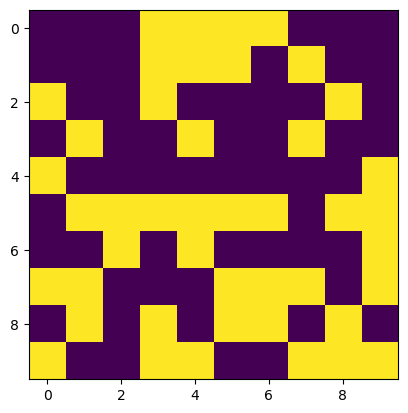

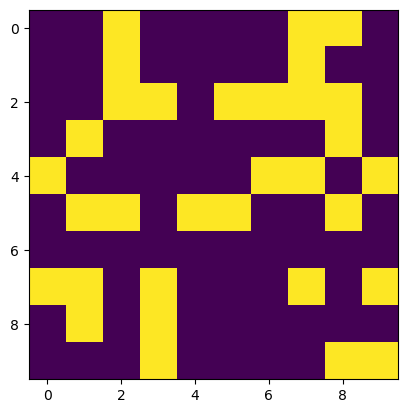

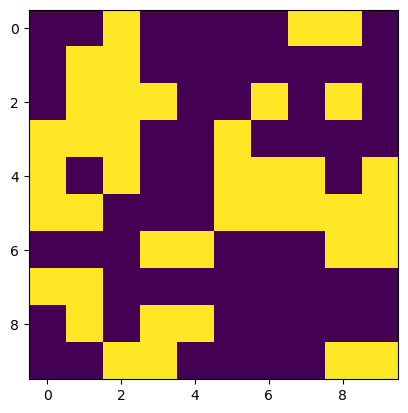

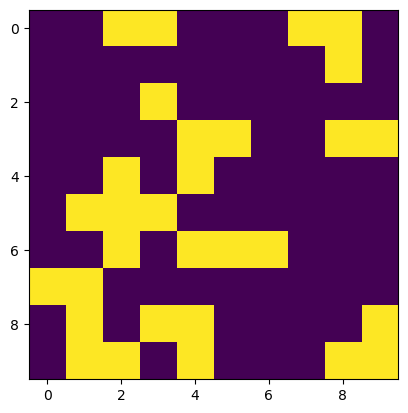

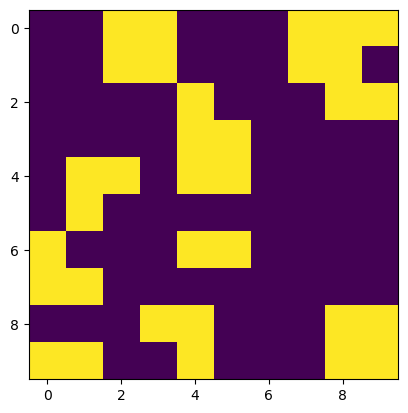

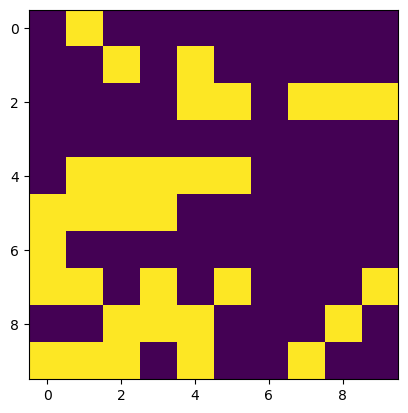

In [25]:
def initial_state(size=10):
    return np.random.randint(0, 2, size=[size,size], dtype='l')

iterations(initial_state,size=10,layers=1,number_of_iterations=5)

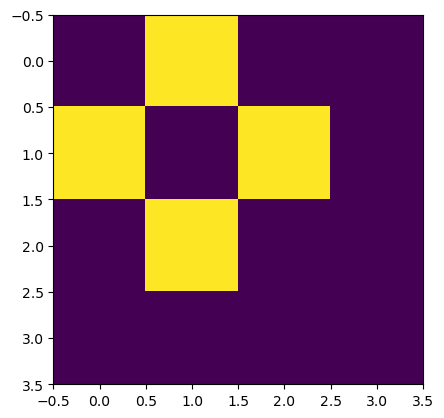

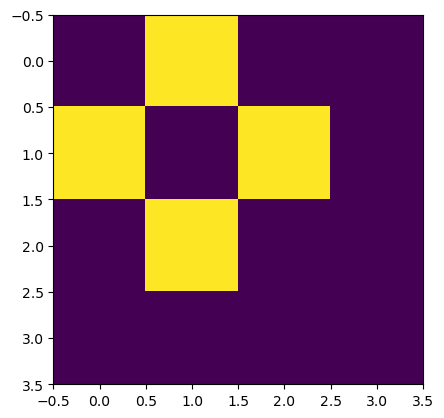

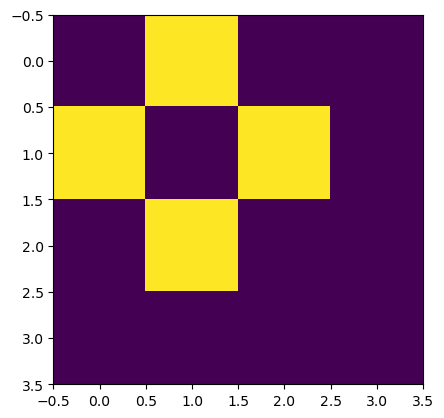

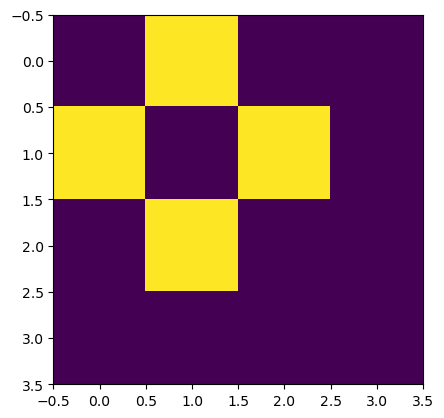

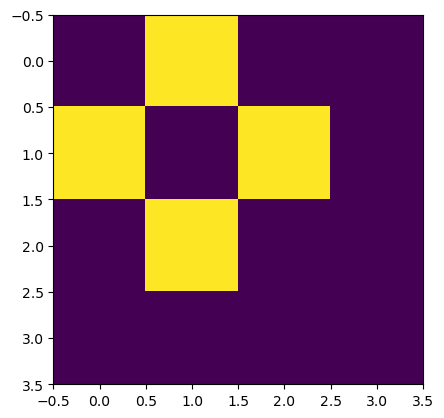

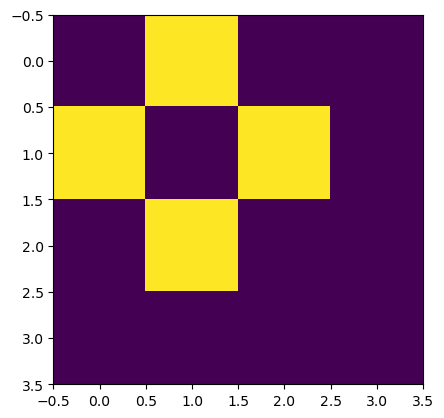

In [27]:
def initial_state2():
    return np.array([[0,1,0,0],[1,0,1,0],[0,1,0,0],[0,0,0,0]])

iterations(initial_state2,size=4,layers=1,number_of_iterations=5)

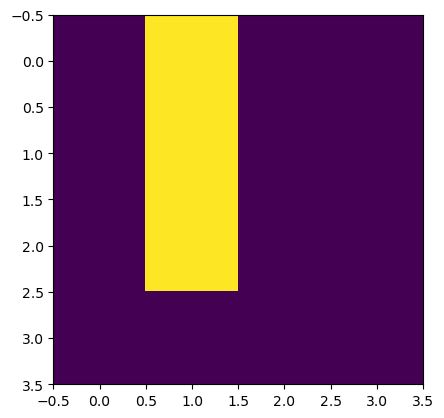

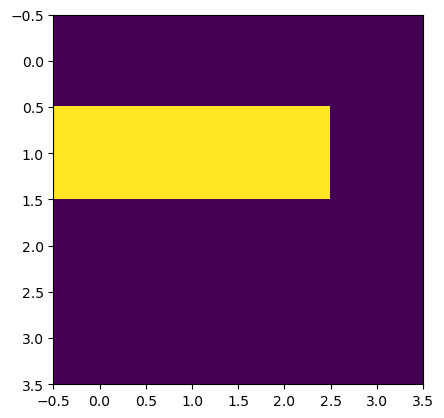

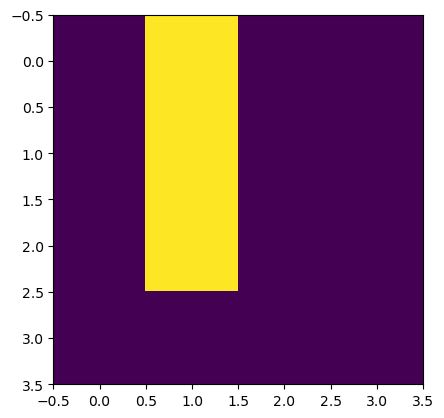

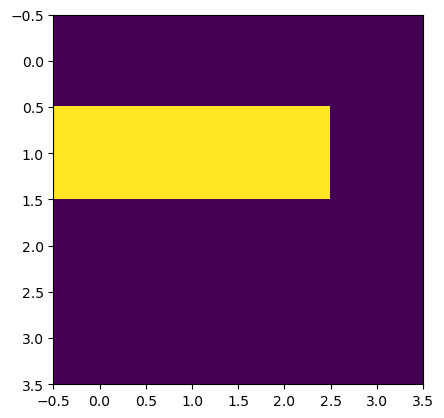

In [28]:
def initial_state3():
    return np.array([[0,1,0,0],[0,1,0,0],[0,1,0,0],[0,0,0,0]])

iterations(initial_state3,size=4,layers=1,number_of_iterations=3)

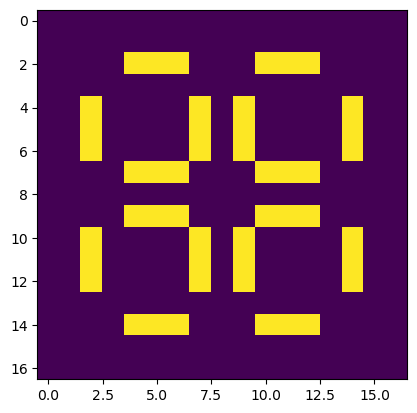

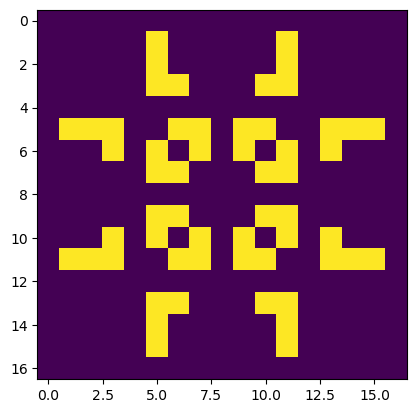

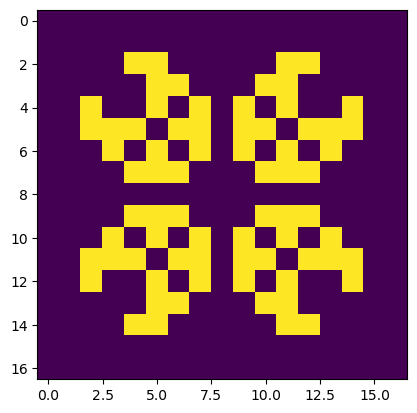

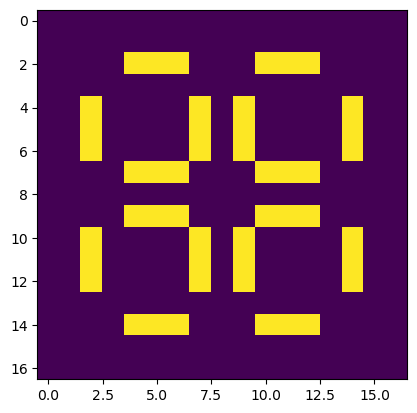

In [29]:
def initial4():
    X = np.zeros((17, 17))
    X[2, 4:7] = 1
    X[4:7, 7] = 1
    X += X.T
    X += X[:, ::-1]
    X += X[::-1, :]
    return X
    
iterations(initial4,size=17,layers=1,number_of_iterations=3)

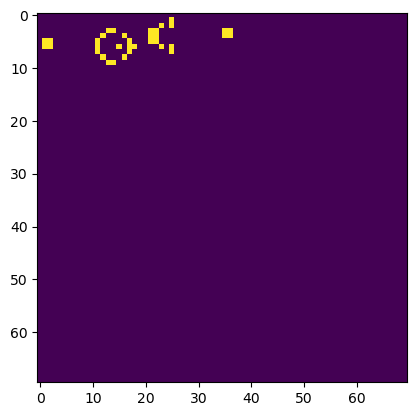

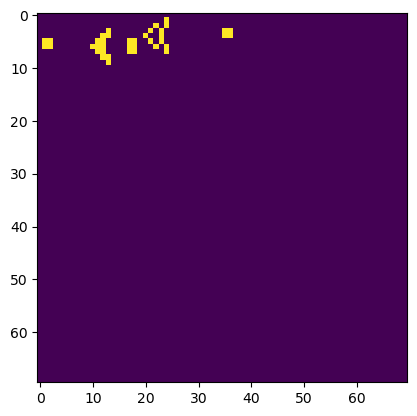

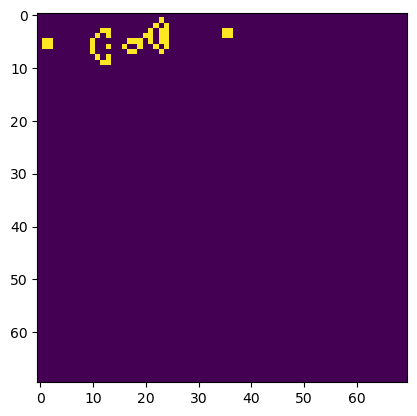

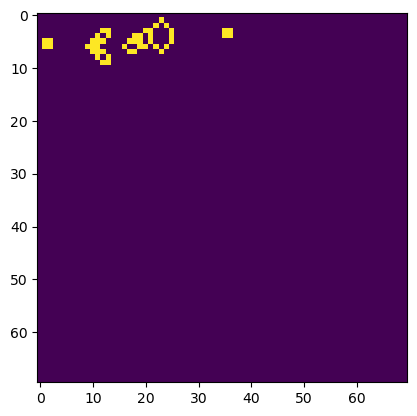

In [30]:
def initial5():
    glider_gun =\
    [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
     [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
     [1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

    X = np.zeros((70, 70))
    X[1:10,1:37] = glider_gun
    return X
    
iterations(initial5,size=70,layers=1,number_of_iterations=3)

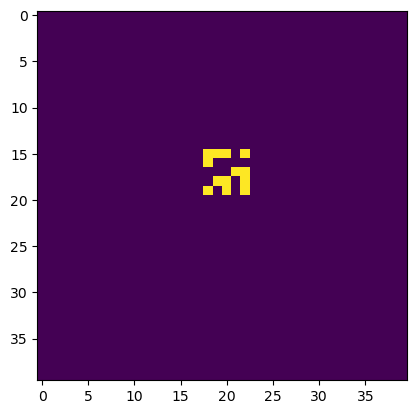

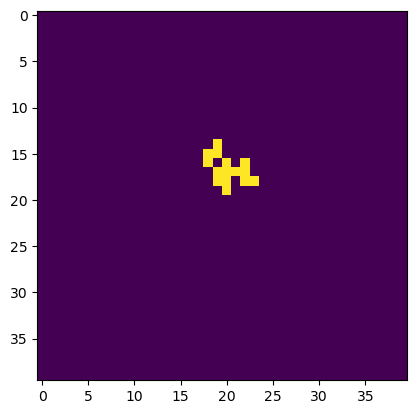

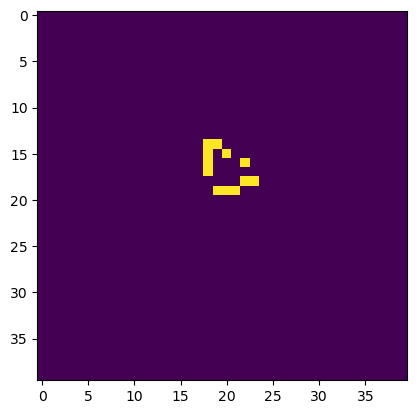

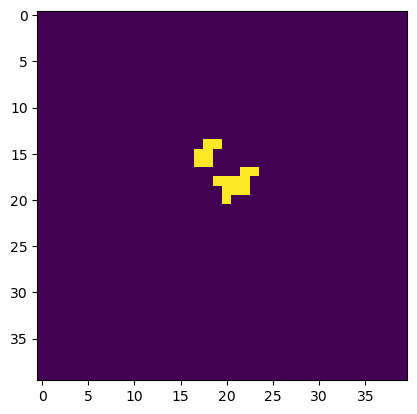

In [31]:
def initial7():
    unbounded = [[1, 1, 1, 0, 1],
                 [1, 0, 0, 0, 0],
                 [0, 0, 0, 1, 1],
                 [0, 1, 1, 0, 1],
                 [1, 0, 1, 0, 1]]
    X = np.zeros([40, 40])
    X[15:20, 18:23] = unbounded
    return X

iterations(initial7,size=40,layers=1,number_of_iterations=3)